In [2]:

# task 1
import pandas as p
import matplotlib.pyplot as g
import seaborn as s
from sklearn.pipeline import Pipeline as pipe 
from sklearn.impute import SimpleImputer as si
from sklearn.preprocessing import StandardScaler as ss
from sklearn.compose import ColumnTransformer as ct
from sklearn.model_selection import train_test_split as tt
from xgboost import XGBClassifier as xg  
from sklearn.ensemble import AdaBoostClassifier as ad , RandomForestClassifier as rf , VotingClassifier as vc
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acc  , classification_report as cr  , confusion_matrix as cm 

In [3]:
na_values = ['na' , 'N/A' , '??', '--']

df = p.read_csv('heart.csv', na_values=na_values)

In [4]:
print(df.head(10).T)

              0      1      2      3      4      5      6      7      8      9
age        52.0   53.0   70.0   61.0   62.0   58.0   58.0   55.0   46.0   54.0
sex         1.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0    1.0    1.0
cp          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
trestbps  125.0  140.0  145.0  148.0  138.0  100.0  114.0  160.0  120.0  122.0
chol      212.0  203.0  174.0  203.0  294.0  248.0  318.0  289.0  249.0  286.0
fbs         0.0    1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0
restecg     1.0    0.0    1.0    1.0    1.0    0.0    2.0    0.0    0.0    0.0
thalach   168.0  155.0  125.0  161.0  106.0  122.0  140.0  145.0  144.0  116.0
exang       0.0    1.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0
oldpeak     1.0    3.1    2.6    0.0    1.9    1.0    4.4    0.8    0.8    3.2
slope       2.0    0.0    0.0    2.0    1.0    1.0    0.0    1.0    2.0    1.0
ca          2.0    0.0    0.0    1.0    3.0    0.0  

In [5]:
percent = df['target'].value_counts(normalize=True)
print(f"protions {percent}")

protions target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


In [6]:

df = df.drop_duplicates()



In [7]:
X = df.drop('target' , axis =1)
y = df['target']

In [8]:
cat = X.select_dtypes(include=['object','category']).columns.tolist()

cat_pipe = pipe(steps=[
    
    ('impute', si(strategy='most_frequent'))
    
])


In [9]:

num = X.select_dtypes(include=['int','float']).columns.tolist()


num_pipe = pipe(steps=[
    ('impute' , si(strategy='mean')),
    ('scaler' , ss())
    
    
    
])


In [10]:
transform = ct(transformers =[
    ('numbers' ,num_pipe , num) , 
    ('objects' , cat_pipe , cat),
])

In [11]:
pro = pipe(steps =[
    ('transfrom' ,transform ) ,
    ('classifer ' , ad())
])

In [17]:
xtrain , xtest, ytrain , ytest =tt(X,y,  test_size = 0.2 , random_state = 0 , stratify = y )
xtrain , xval, ytrain , yval =tt(xtrain,ytrain,  test_size = 0.2 , random_state = 0 , stratify = ytrain)

# for hyperparameter tuning 

In [18]:
pro.fit(xtrain, ytrain)

c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('transfrom',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal']),
                                                 ('objects',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('classifer ', AdaBoostClassifier())])

In [19]:
print(f" ad ta: {pro.score(xtrain, ytrain)}")
print(f" ad test : {pro.score(xtest, ytest)}")


 ad ta: 0.9791666666666666
 ad test : 0.8032786885245902


In [20]:
pro = pipe(steps =[
    ('transfrom' ,transform ) ,
    ('classifer ' , rf())
])

In [22]:
pro.fit(xtrain, ytrain)

Pipeline(steps=[('transfrom',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal']),
                                                 ('objects',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('classifer ', RandomForestClassifier())])

In [24]:
print(f" rf ta: {pro.score(xtrain, ytrain)}")
print(f" rf test : {pro.score(xtest, ytest)}")

 rf ta: 1.0
 rf test : 0.8524590163934426


In [25]:
pro = pipe(steps =[
    ('transfrom' ,transform ) ,
    ('classifer ' , xg())
])

In [26]:
pro.fit(xtrain, ytrain)

Pipeline(steps=[('transfrom',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal']),
                                                 ('objects',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('classifer ',
                 XGB...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [27]:
print(f"  xg ta: {pro.score(xtrain, ytrain)}")
print(f" xg test : {pro.score(xtest, ytest)}")

  xg ta: 1.0
 xg test : 0.7704918032786885


In [20]:
## task 2

In [21]:
from sklearn.ensemble import VotingClassifier  as vc

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dt

In [22]:
X = df.drop(columns=['target' , 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs' , 'thalach',
       'exang', 'slope', 'ca', 'thal'] , axis =1)
y = df['target']

In [23]:
print(X.columns)

Index(['restecg', 'oldpeak'], dtype='object')


In [24]:
pro = vc(estimators=[
    ('dt' , dt()),
    ('knn' , knn()) , 
    ('ad', ad()) ,
    ('rf' , rf()) 
] ,
    voting = 'hard'
    )

In [25]:
X_train , X_test, y_train , y_test =tt(X,y,  test_size = 0.2 , random_state = 0 , stratify = y )

pro.fit(X_train , y_train)

c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ad', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier())])

In [26]:
print(f" training accuracy is {pro.score(X_train , y_train)}")
print(f" testing  accuracy is {pro.score(X_test , y_test)}")

 training accuracy is 0.7551867219917012
 testing  accuracy is 0.6557377049180327


In [27]:
pro = vc(estimators=[
    ('dt' , dt()),
    ('knn' , knn()) , 
    ('ad', ad()) ,
    ('rf' , rf()) 
] ,
    voting = 'soft'
    )

In [28]:
X_train , X_test, y_train , y_test =tt(X,y,  test_size = 0.2 , random_state = 0 , stratify = y )

pro.fit(X_train , y_train)

c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ad', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [29]:
print(f" training accuracy is {pro.score(X_train , y_train)}")
print(f" testing  accuracy is {pro.score(X_test , y_test)}")

 training accuracy is 0.7593360995850622
 testing  accuracy is 0.6721311475409836


c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\cyc

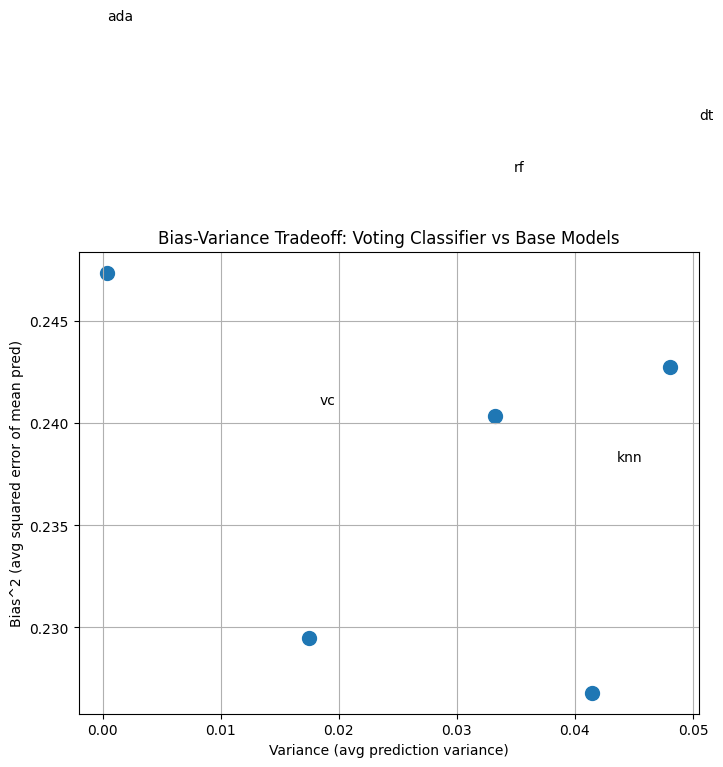

dt                  : bias=0.2428, variance=0.048093, error=0.3297
knn                 : bias=0.2268, variance=0.041442, error=0.3516
ada                 : bias=0.2474, variance=0.000359, error=0.3187
rf                  : bias=0.2403, variance=0.033197, error=0.3407
vc                  : bias=0.2295, variance=0.017521, error=0.3297


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define your models as a dictionary
models = {
    'dt': dt(),
    'knn': knn(),
    'ada': ad(),
    'rf': rf(),
    'vc': vc(estimators=[
        ('dt', dt()),
        ('knn', knn()),
        ('ad', ad()),
        ('rf', rf())
    ], voting='soft')
}

n_rounds = 50
test_size = 0.3
rng = np.random.RandomState(42)

# Fixed test set for fair bias/variance comparison
X_train_full, X_test, y_train_full, y_test = tt(X, y, test_size=test_size, random_state=0, stratify=y)

preds = {name: np.zeros((n_rounds, len(y_test))) for name in models.keys()}

for i in range(n_rounds):
    # Resample training set (bootstrap)
    idx = rng.choice(len(X_train_full), size=len(X_train_full), replace=True)
    # Use .iloc for pandas DataFrames
    X_train, y_train = X_train_full.iloc[idx], y_train_full.iloc[idx]
    
    for name, model in models.items():
        m = model  # Create fresh model each iteration
        m.fit(X_train, y_train)
        # Use predict_proba for smoother bias/variance estimates
        proba = m.predict_proba(X_test)[:, 1]
        preds[name][i, :] = proba

# Compute bias, variance, and error for each model
results = {}
for name, arr in preds.items():
    mean_pred = arr.mean(axis=0)
    var_pred = arr.var(axis=0)
    y_true = y_test.values  # Convert to numpy array
    
    # Bias per point
    bias_sq = (y_true - mean_pred) ** 2
    bias = bias_sq.mean()
    variance = var_pred.mean()
    
    # Classification error
    mean_pred_labels = (mean_pred >= 0.5).astype(int)
    error = (mean_pred_labels != y_true).mean()
    results[name] = {'bias': bias, 'variance': variance, 'error': error}

# Plot Bias vs Variance
names = list(results.keys())
biases = [results[n]['bias'] for n in names]
variances = [results[n]['variance'] for n in names]
errors = [results[n]['error'] for n in names]

plt.figure(figsize=(8,6))
plt.scatter(variances, biases, s=100)
for i, name in enumerate(names):
    plt.text(variances[i]*1.05, biases[i]*1.05, name)
plt.xlabel('Variance (avg prediction variance)')
plt.ylabel('Bias^2 (avg squared error of mean pred)')
plt.title('Bias-Variance Tradeoff: Voting Classifier vs Base Models')
plt.grid(True)
plt.show()

# Print results
for name in names:
    print(f"{name:20s}: bias={results[name]['bias']:.4f}, variance={results[name]['variance']:.6f}, error={results[name]['error']:.4f}")

In [31]:
from sklearn.model_selection import RandomizedSearchCV as rc
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
import pandas as pd


knnp = {
    "n_neighbors": list(range(1, 26)),
    "weights": ["uniform", "distance"],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}




# Randomized Search
pro = rc(
    estimator=knn(),
    param_distributions=knnp,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    return_train_score=True 
)

# Fit model
pro.fit(X_train, y_train)

print(f"\nBest KNN params: {pro.best_params_}")
print(f"Best CV Score: {pro.best_score_:.4f}")

df = pd.DataFrame(pro.cv_results_)



print("\nTop parameter combinations:")
print(df.head(10))  # show top 10



print(f"training acc {pro.score(X_train , y_train)}")
print(f"testing  acc {pro.score(X_test , y_test)}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best KNN params: {'weights': 'uniform', 'n_neighbors': 25, 'algorithm': 'kd_tree'}
Best CV Score: 0.7249

Top parameter combinations:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.004754      0.000670         0.005716        0.001781      distance   
1       0.005707      0.002139         0.006274        0.001719      distance   
2       0.004623      0.001039         0.013064        0.000177       uniform   
3       0.004059      0.001652         0.180722        0.003581       uniform   
4       0.002687      0.000958         0.011017        0.001033       uniform   
5       0.003685      0.001253         0.004435        0.001072      distance   
6       0.003626      0.000554         0.005633        0.003293      distance   
7       0.002680      0.001255         0.174816        0.000042       uniform   
8       0.002606      0.000821         0.179643        0.003221       uni

In [32]:
dtp = {
    
    'max_features' : ["sqrt", "log2"] ,
      'max_depth' : list(range(1,10))
    }


pro = rc(
    estimator=dt(),
    param_distributions=dtp,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    return_train_score=True 
)
# Fit model
pro.fit(X_train, y_train)

print(f"\nBest KNN params: {pro.best_params_}")
print(f"Best CV Score: {pro.best_score_}")

df = pd.DataFrame(pro.cv_results_)



print("\nTop parameter combinations:")
print(df.head(10))  # show top 10



print(f"training acc {pro.score(X_train , y_train)}")
print(f"testing  acc {pro.score(X_test , y_test)}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best KNN params: {'max_features': 'log2', 'max_depth': 3}
Best CV Score: 0.7152917505030181

Top parameter combinations:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004187      0.000496         0.004456        0.000772   
1       0.009591      0.008430         0.002772        0.000527   
2       0.003004      0.000006         0.002004        0.000004   
3       0.004198      0.000888         0.003217        0.000870   
4       0.003709      0.000746         0.002174        0.000244   
5       0.002502      0.000696         0.004420        0.000621   
6       0.004008      0.001629         0.003281        0.001393   
7       0.003472      0.001127         0.003927        0.000309   
8       0.011181      0.012128         0.001669        0.000475   
9       0.003772      0.000534         0.002665        0.000946   

  param_max_features param_max_depth  \
0               sqrt               1   

c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [35]:
adp = {
    'estimator': [dt()],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

pro = rc(
    estimator=ad(),
    param_distributions=adp,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    return_train_score=True 
)
# Fit model
pro.fit(X_train, y_train)

print(f"\nBest KNN params: {pro.best_params_}")
print(f"Best CV Score: {pro.best_score_}")

df = pd.DataFrame(pro.cv_results_)



print("\nTop parameter combinations:")
print(df.head(10))  # show top 10



print(f"training acc {pro.score(X_train , y_train)}")
print(f"testing  acc {pro.score(X_test , y_test)}")


c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Best KNN params: {'n_estimators': 150, 'learning_rate': 1.0, 'estimator': DecisionTreeClassifier()}
Best CV Score: 0.7248826291079813

Top parameter combinations:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.225298      0.087057         0.016962        0.002858   
1       0.407780      0.094553         0.025636        0.000929   
2       0.461522      0.030679         0.035110        0.000984   
3       0.276073      0.077163         0.020505        0.006948   
4       0.304233      0.020546         0.022939        0.000918   
5       0.409796      0.015808         0.038966        0.004376   
6       0.134708      0.008542         0.012569        0.001305   
7       0.257518      0.002941         0.022949        0.001425   
8       0.371878      0.011698         0.026364        0.009592   
9       0.130283      0.005168         0.017395        0.005161   

  param_n_estimators param_learning_rate           param_estimator  \
0                 50        

In [37]:
rfp = {
     'n_estimators' : list(range(1,20)),    
'criterion' : ["gini", "entropy", "log_loss"]
    }


pro = rc(
    estimator = rf(),

    param_distributions = rfp,
n_iter =100,
n_jobs = -1,
 cv = 3,
verbose = 2,
 random_state = 42,
return_train_score = True
)

pro.fit(X_train, y_train)
print(f"\nBest KNN params: {pro.best_params_}")
print(f"Best CV Score: {pro.best_score_}")

df = pd.DataFrame(pro.cv_results_)



print("\nTop parameter combinations:")
print(df.head(10))  # show top 10



print(f"training acc {pro.score(X_train , y_train)}")
print(f"testing  acc {pro.score(X_test , y_test)}")

c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 57 is smaller than n_iter=100. Running 57 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 57 candidates, totalling 171 fits

Best KNN params: {'n_estimators': 16, 'criterion': 'gini'}
Best CV Score: 0.7391012743125419

Top parameter combinations:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007228      0.000947         0.002506        0.000404   
1       0.008309      0.001830         0.002492        0.000343   
2       0.009074      0.001312         0.001844        0.001037   
3       0.008591      0.001252         0.005148        0.000546   
4       0.013295      0.001235         0.002885        0.000681   
5       0.015423      0.000963         0.003181        0.000239   
6       0.017985      0.001702         0.002740        0.000042   
7       0.018549      0.002245         0.003614        0.001182   
8       0.023906      0.002345         0.002977        0.000845   
9       0.029340      0.002230         0.004331        0.000942   

  param_n_estimators param_criterion  \
0                  1            gini 

In [ ]:
from sklearn.metrics import classification_report as cr , confusion_matrix as cm

yp= pro.predict(X_test)
print(f"Classification Report:\n{cr(y_test, yp)}")


print(f"Confusion Matrix:{cm(y_test,yp)}")

# ytest vs predict both 

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix:[[22  6]
 [ 6 27]]


In [ ]:
# last task 
X = df.drop(columns=['age', 'sex', 'cp', 'trestbps',  'fbs', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] , axis =1)
y = df['target']

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
pro = vc(estimators=[
    ('ad', ad()) ,
    ('rf' , rf()) 
] ,
    voting = 'soft'
    )

In [ ]:
X_train , X_test, y_train , y_test =tt(X,y,  test_size = 0.2 , random_state = 0 , stratify = y )

pro.fit(X_train , y_train)

c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('ad', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [ ]:
print(f" training accuracy is {pro.score(X_train , y_train)}")
print(f" testing  accuracy is {pro.score(X_test , y_test)}")

 training accuracy is 0.8962655601659751
 testing  accuracy is 0.5409836065573771


c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest → Train: 1.000, Test: 1.000
AdaBoost → Train: 0.950, Test: 1.000
Voting Ensemble → Train: 0.992, Test: 1.000


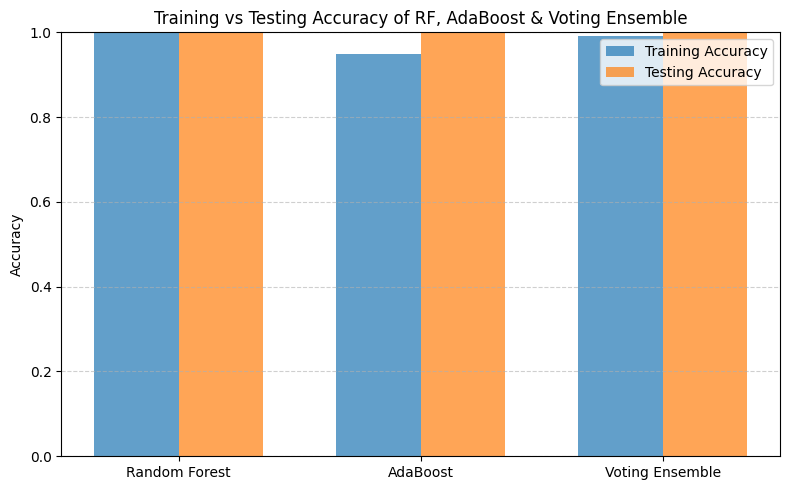

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# --- Load Data ---
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize Models ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
vote = VotingClassifier(
    estimators=[('rf', rf), ('ada', ada)],
    voting='soft'  # or 'hard'
)

# --- Train Models ---
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)
vote.fit(X_train, y_train)

# --- Compute Accuracies ---
acc = {
    'Model': ['Random Forest', 'AdaBoost', 'Voting Ensemble'],
    'Train Accuracy': [
        rf.score(X_train, y_train),
        ada.score(X_train, y_train),
        vote.score(X_train, y_train)
    ],
    'Test Accuracy': [
        rf.score(X_test, y_test),
        ada.score(X_test, y_test),
        vote.score(X_test, y_test)
    ]
}


for i in range(3):
    print(f"{acc['Model'][i]} → Train: {acc['Train Accuracy'][i]:.3f}, Test: {acc['Test Accuracy'][i]:.3f}")

# --- Plot Accuracies ---
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(acc['Model']))

plt.bar(x, acc['Train Accuracy'], width=bar_width, label='Training Accuracy', alpha=0.7)
plt.bar([i + bar_width for i in x], acc['Test Accuracy'], width=bar_width, label='Testing Accuracy', alpha=0.7)

plt.xticks([i + bar_width / 2 for i in x], acc['Model'])
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy of RF, AdaBoost & Voting Ensemble")
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
